Name: Sharmin Siddika

Labpartner(s): Mariam Valladares

In [1]:
#import statements go here
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Class 12.2

# Warmup 12.2

Kelsey and Asante are going to demo ARC PRO and give you some exercises.

# Lecture 12.2

### Announcements

- Reminder **Reminder all labs through 9.2 need to be completed, or resubmitted if you did not get a satisfactory grade, by end of the day Friday 11/15 to pass the course.** The understanding of this beginning material is needed to complete this course. If you turned it in or resubmitted one and are waiting for me to grade it, no worries. We can get them all finalized next week. 
  
- We are going to do an advanced lab today. For those of you struggling to catch up, you can not worry about this one and focus on previous labs. See syllabus for grading policy.


### Agenda
- Predator prey modeling. We are going to actually do some scientific modelng today!

## Predator Prey Modeling

See what this lab was based on here: 

https://github.com/numerical-mooc/assignment-bank/blob/master/Lessons.and.Assignments/Predator.Prey.Model/Predator.Prey.Model.ipynb

For a more advanced example in predator prey modeling:

https://waterprogramming.wordpress.com/tag/predator-prey/

Modeling the zombie aplocalypse:

https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html



###  12.2.1 Lotka-Volterra Equations

The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order, non-linear, differential
equations. They are frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and
the other as prey. You can read more about this from Wikipedia <http://en.wikipedia.org/wiki/Lotka-Volterra_equation>.

#### Equations describing the system

 Their populations change with time according to the following pair of equations:

$ dx/dt = x ( \alpha - \beta y  ) $

$ dy/dt = -y( \gamma - \delta x ) $

Where, $x$ is the number of prey (e.g., phytoplankton), $y$ is the number of predators (e.g., zooplankton). $dx/dt, dy/dt$ gives the rate of change of their respective populations over 
time $t$. $\alpha, \beta, \gamma, \delta $ are the parameters describing the interaction between the two species. This models makes some assumptions about 
the predator and prey. You can read about them from the Wikipedia page mentioned above.

The above equations can be written in a slightly different form to interpret the physical meaning of the four parameters used.

1.Rate equation for prey

$dx/dt = \alpha x - \beta x y $

The prey population (x) is presumed to have unlimited supply of food, $\alpha x$ represents the rate of population growth of prey. Rate of decrease of population of prey is assumed to be proportional to the rate at which predator and prey encounter each other, given by $ \beta y x$

2.Rate equation for predator

$ dy/dt = \delta x y -\gamma y $

For the predator population (y), $\delta x y $ gives the rate of growth of predator population. Note that this is similar to the rate of decrease of population of prey. The second term $\gamma y $ gives the rate of population decrease for predators due to natural death or emigration.

In [2]:
#𝑑𝑥/𝑑𝑡=𝑥(𝛼−𝛽𝑦) = 𝑥𝛼 is the growth. and -x𝛽𝑦 is the grazing. y eating x for 𝑑𝑦/𝑑𝑡=−𝑦(𝛾−𝛿𝑥) equation +𝛿𝑥y is the grazing, y grows from eating x.  

### 12.2.2 Numerical solution using Python

A simple python code for solving these equations is shown below.

In [3]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# set the parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [5]:
#define the time stepping scheme - Euler forward or "shooting" method

def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [6]:
# define the function that represents the Lotka-Volterra equations
# u is the x,y state of the system, what the population is at a given time.
# u = [x,y] on array with both the predetor and prey variables

def f(u):
    """Returns the rate of change of species
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])


In [7]:
# now solve the sytem


# set time-increment and discretize the time
T  = 15.0                           # final time in years
dt = 0.01                           # set time-increment 
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])


In [8]:
u_euler

array([[10.,  2.],
       [ 0.,  0.],
       [ 0.,  0.],
       ...,
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [9]:
n = 0
u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [10]:
u_euler

array([[10.  ,  2.  ],
       [ 9.86,  2.12],
       [ 0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ]])

In [11]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [12]:
u_euler

array([[10.        ,  2.        ],
       [ 9.86      ,  2.12      ],
       [ 9.7077616 ,  2.244232  ],
       ...,
       [ 0.87954346,  0.04493602],
       [ 0.88786462,  0.04353381],
       [ 0.89627944,  0.04217898]])

We will now plot the variation of population for each species with time.

In [13]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

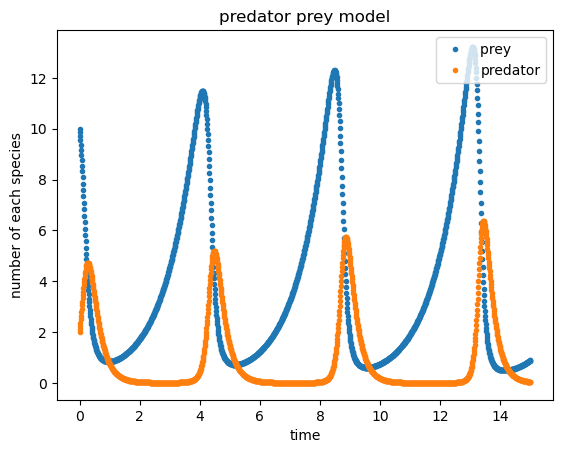

In [14]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Let's think a bit about what this solution means, what is going on here?

**Answer** The graph shows growth change in predator prey numbers. Initially, the predator number was 2, while the prey was 10. Predator started to grow by eating prey and stopped at 4 as there were no more prey. As prey started to reduce, predator also started to decline to. Again as the predator started to decrease, prey started to grow eventually.

What happens if we start with different initial conditions? Like more prey and less predators.

In [15]:
# set the parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [16]:
# now solve the sytem


# set time-increment and discretize the time
T  = 15.0                           # final time in years
dt = 0.01                           # set time-increment 
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 5. # initial prey amount
y0 = 0. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [17]:
u_euler

array([[5., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [18]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [19]:
u_euler

array([[5.00000000e+00, 0.00000000e+00],
       [5.05000000e+00, 0.00000000e+00],
       [5.10050000e+00, 0.00000000e+00],
       ...,
       [1.48726354e+07, 0.00000000e+00],
       [1.50213617e+07, 0.00000000e+00],
       [1.51715753e+07, 0.00000000e+00]])

In [20]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

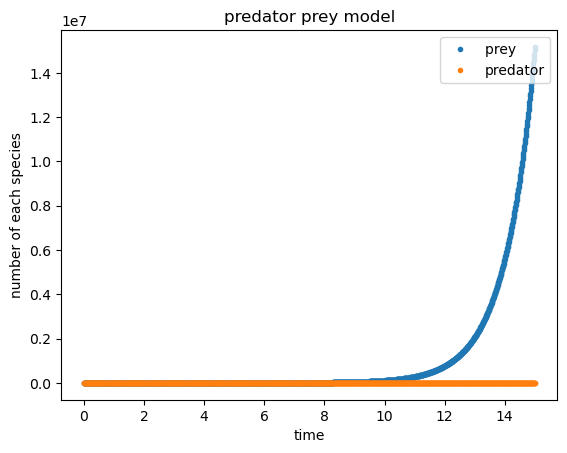

In [21]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

What happened?

**Answer** No predator to eat the prey. As a result, the prey had a gradual increase in number.

What if we start with the same amount of prey and predators?

In [22]:
# set the parameters
alpha = 10.
beta = 1.2
gamma = 4.
delta = 1.

In [23]:
# now solve the sytem


# set time-increment and discretize the time
T  = 15.0                           # final time in years
dt = 0.01                           # set time-increment 
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 5. # initial prey amount
y0 = 5. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [24]:
u_euler

array([[5., 5.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [25]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [26]:
u_euler

array([[5.00000000e+00, 5.00000000e+00],
       [5.20000000e+00, 5.05000000e+00],
       [5.40488000e+00, 5.11060000e+00],
       ...,
       [4.21149227e-04, 9.81963679e-05],
       [4.63263653e-04, 9.42689267e-05],
       [5.09589494e-04, 9.04986064e-05]])

In [27]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

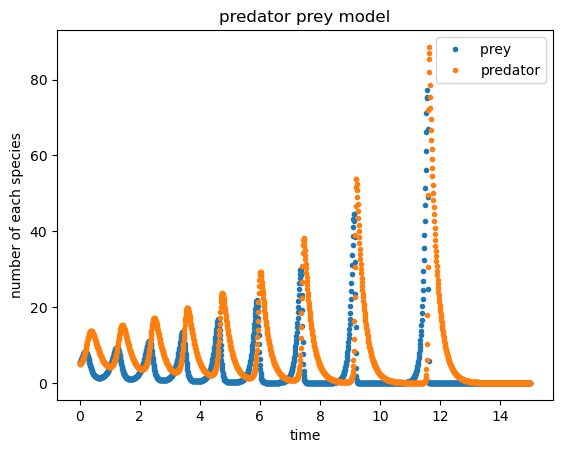

In [28]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

What happened?

**Answer** At the start (time t = 0), there are equal numbers of prey and predator. Prey Population initially grows in the absence of predators but begins to decline as predator population increases.
Predator Population increases following the rise in prey, peaks, and then falls as prey population becomes scarce.

Let's mess around with the model parameters. What if the prey grow faster?

In [29]:
# set the parameters
alpha = 11.
beta = 1.2
gamma = 4.
delta = 1.

In [30]:
# set time-increment and discretize the time
T  = 15.0                           # final time in years
dt = 0.01                           # set time-increment 
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 20. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [31]:
u_euler

array([[10., 20.],
       [ 0.,  0.],
       [ 0.,  0.],
       ...,
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [32]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [33]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

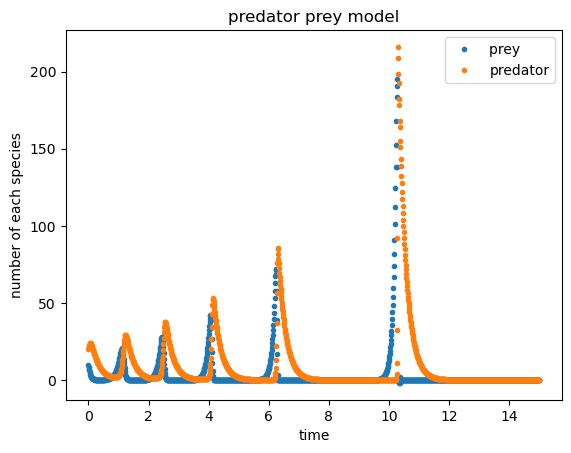

In [34]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

**Answer** If the preys grow faster, gradually the predators increase because they eat them. Then the amount of preys decrease and the predators increase and this continues

In [35]:
# set the parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [36]:
#define the time stepping scheme - Euler forward or "shooting" method

def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [37]:
# define the function that represents the Lotka-Volterra equations
# u is the x,y state of the system, what the population is at a given time.
# u = [x,y] on array with both the predetor and prey variables

def f(u):
    """Returns the rate of change of species
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])

In [38]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [39]:
u_euler

array([[10.,  2.],
       [ 0.,  0.],
       [ 0.,  0.],
       ...,
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [40]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [41]:
u_euler

array([[10.        ,  2.        ],
       [ 9.86      ,  2.12      ],
       [ 9.7077616 ,  2.244232  ],
       ...,
       [ 0.87954346,  0.04493602],
       [ 0.88786462,  0.04353381],
       [ 0.89627944,  0.04217898]])

In [42]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

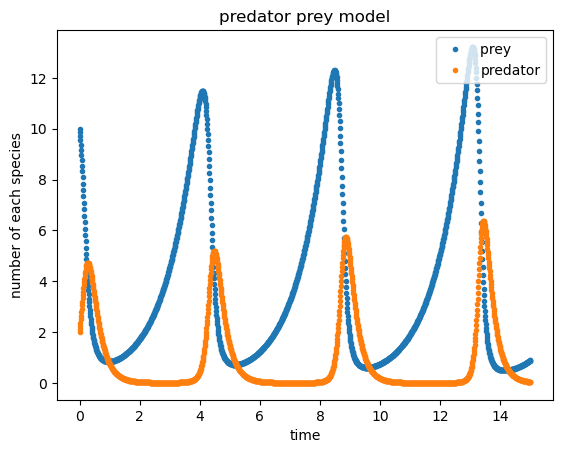

In [43]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

What happened?

**Answer** When prey numbers are high, predator numbers rise due to the abundant food supply.
As predator numbers rise, they reduce the prey population, which eventually causes the predator population to decline.
When predator numbers decline, prey are able to recover, restarting the cycle.

### 12.2.3 System behavior

A better understanding of the system behavior can be obtained by a phase plot of the population of predators vs. the population of prey. It will tell us if the system sustains or collapses over time. For the choice of parameters $ \alpha, \beta, \gamma $ and $ \delta $ made above, we see that the maximum population of each species keeps increasing each cycle. You can read more about that in the Wikipedia link mentioned above.

Text(0.5, 1.0, 'predator prey model')

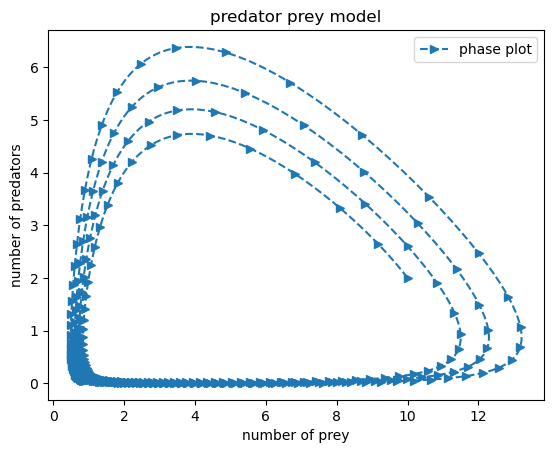

In [44]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

# Lab 12.2

#### E.1 How does timestep affect the solution?
Modify the timestep (or time increment) dt. How does this affect your solutions? Plot both the timeseries and the phase plots. Try making dt 10 times bigger (dt = 0.1) and 10 times smaller. Describe what happens to your results. What happens if you make dt 100 times smaller?

Text(0.5, 1.0, 'predator prey model')

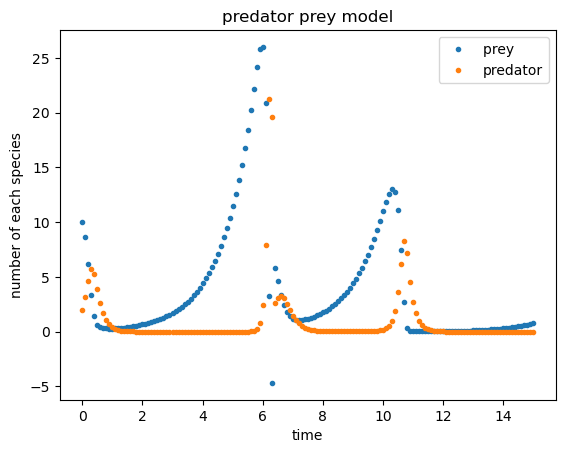

In [45]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.1                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

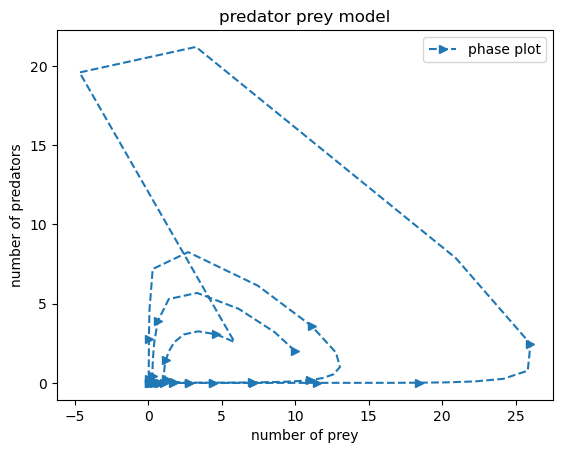

In [46]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

**Answer** A larger dt can cause the solution to miss important details, especially in a model with high growth rates and sharp increase and decrease of this predator-prey system. This may lead to unrealistic results, even population values that explode to infinity. The prey population rapidly increases, reaching unrealistic values, and then abruptly drops below zero. This is a sign of numerical instability.The predator population similarly oscillates unpredictably and sometimes dips below zero, which also makes no sense in reality.

Text(0.5, 1.0, 'predator prey model')

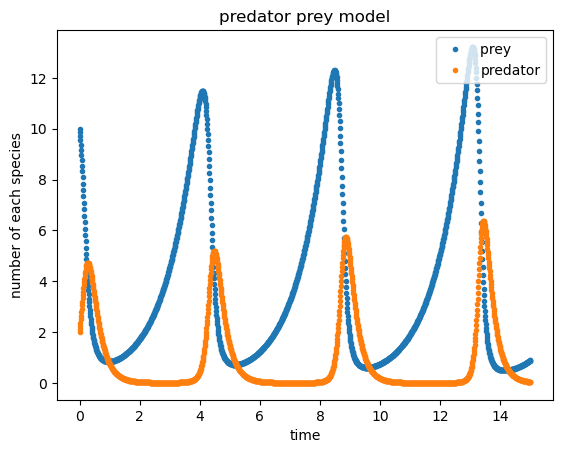

In [73]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment to be smaller
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

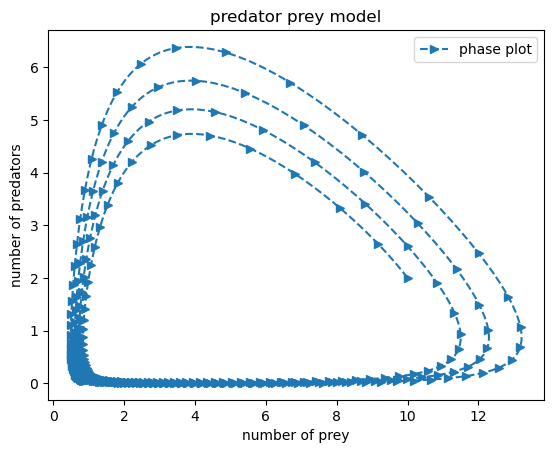

In [74]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

**Answer** A smaller time step provides a finer resolution of the solution, capturing more detail of the predator and prey populations. This can make the solution more accurate, especially in highly dynamic systems where values change rapidly.

Text(0.5, 1.0, 'predator prey model')

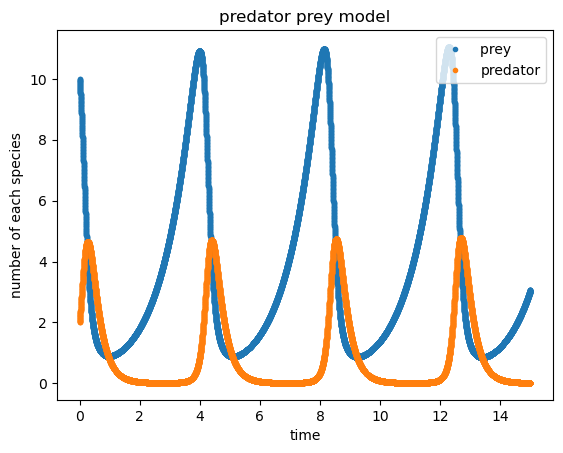

In [75]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.001                           # set time-increment to be smaller
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

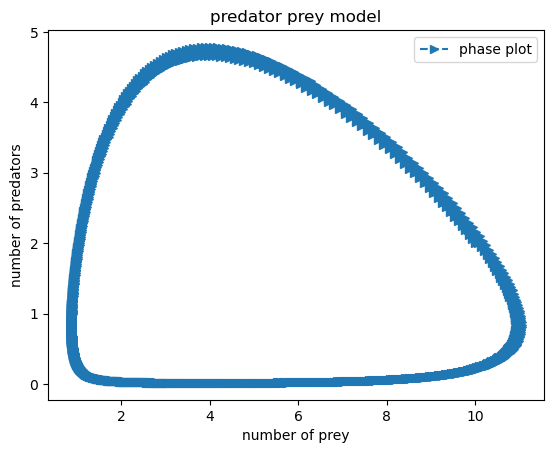

In [76]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

**Answer** With such a small dt, the model calculates changes in predator and prey populations in very small increments, leading to very precise results. This can make the model appear very smooth and reduces the chance of unrealistic spikes or drops in the populations.

#### E.2 Adding the steady state

The steady state(s) of the system are found by setting the population equations to zero, that is the solution to when the population is not changing. This is also called a "fixed point" of the equations, since if the populations start there they stay there, i.e. are fixed.

Find the steady states of the system using algebra. Plot the fixed point (steady state population) of the system on both the timeseries and phase space plots. Describe where the fixed point is in the phase space plot and plot it. What happens if you start at the steady state? What happens if you start near the steady state?

$\alpha x - \beta x y  = 0$

$\delta x y -\gamma y  = 0$



In [54]:
def f(u):
    """Returns the rate of change of species numbers.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])

Text(0.5, 1.0, 'predator prey model')

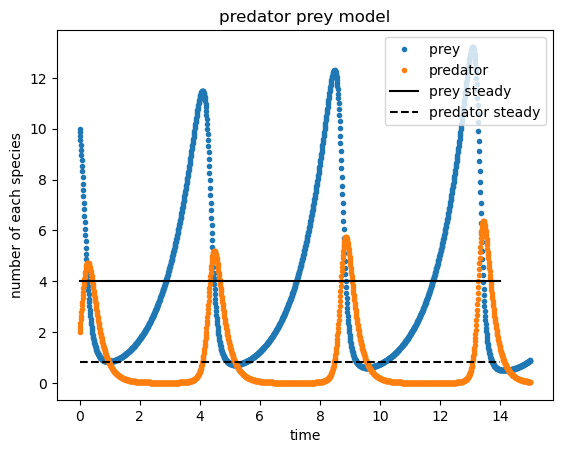

In [55]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.plot([0,14],[4,4], label = "prey steady", color="k")
plt.plot([0,14],[0.83,0.83], label = "predator steady",color="k",linestyle="--")
plt.legend(loc='upper right')
plt.xlabel("time")
plt.ylabel("number of each species")
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

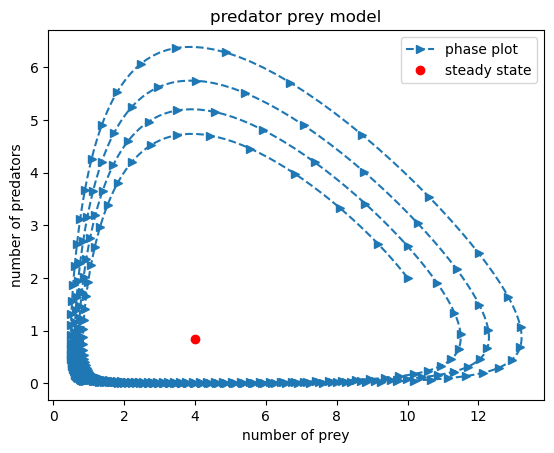

In [56]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.plot(4,0.83,"ro", label = "steady state")
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

**Answer** The steady states, or fixed points, represent the conditions where the populations of prey and predator do not change over time (dx/dt=0 and dy/dt=0). For this system, the steady states are:
(0, 0): Both prey and predator populations are extinct.
(γ/δ,0): Predators go extinct while prey stabilize at a specific population.
(0, α/β): Prey go extinct while predators stabilize at a specific population.
(γ/δ,α/β): Both populations exist in a stable situaltion.

Text(0.5, 1.0, 'predator prey model')

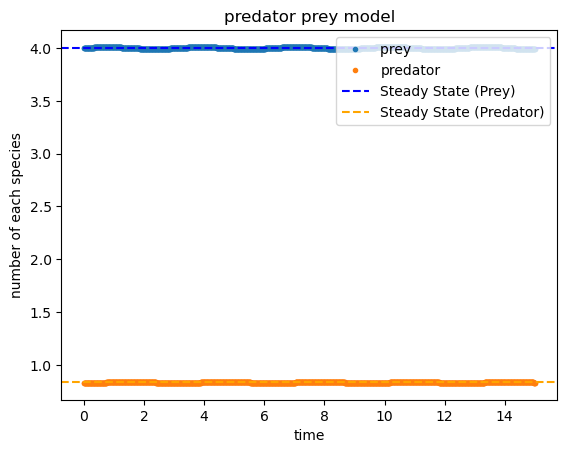

In [24]:
# set the parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

# Steady state
x_star = gamma / delta
y_star = alpha / beta


# Now solve the sustem
# Define the system of equations
def f(u, t):
    x, y = u
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return np.array([dxdt, dydt])

# Euler step
def euler_step(u, f, dt, t=0):
    return u + dt * f(u, t)



# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                          # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 4.0 # initial prey amount
y0 = 0.83 # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.axhline(x_star, color='blue', linestyle='--', label='Steady State (Prey)')
plt.axhline(y_star, color='orange', linestyle='--', label='Steady State (Predator)')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

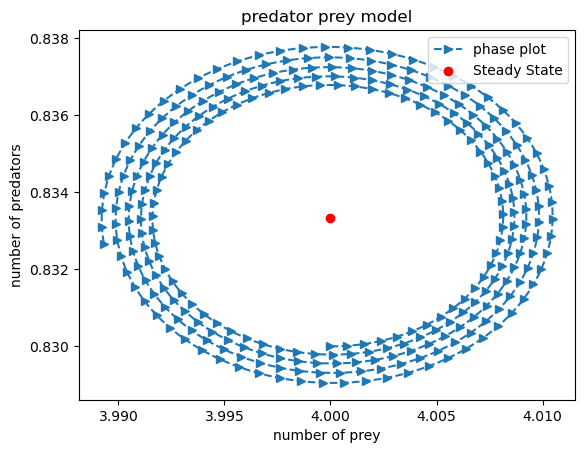

In [25]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.scatter(x_star, y_star, color='red', label='Steady State', zorder=5)
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

**Answer** The system remains fixed, as the net growth for both populations is zero.
The populations oscillate periodically, indicating a balance of predator-prey dynamics, but with cyclical variations in population size.

#### E.3 A better algorithm
Do Exercise 1 again with a fourth order time stepping method called "Runge-Kutta 4" whose algorithm is given below. Do your answers differ? How does the dt, the timestep, affect your answer using this "higher order" algorithm?

In [58]:
def RK4(u,f,dt):
    # Runge Kutta 4th order method
    """Returns the solution at the next time-step using Runge Kutta fourth order (RK4) method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    #calculate slopes
    k1 = f(u)
    u1 = u + (dt/2.)*k1
    k2 = f(u1)
    u2 = u + (dt/2.)*k2
    k3 = f(u2)
    u3 = u + dt*k3
    k4 = f(u3)
    return u + (dt/6.)*(k1 + 2.*k2 + 2.*k3 + k4)

Text(0.5, 1.0, 'predator/prey model')

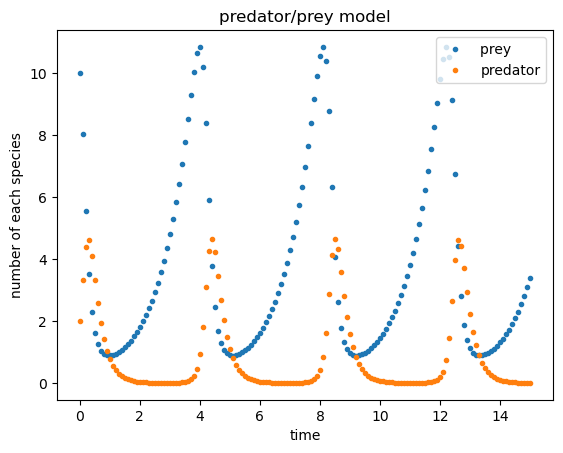

In [59]:
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.1                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)
    

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator/prey model")

Text(0.5, 1.0, 'predator prey model')

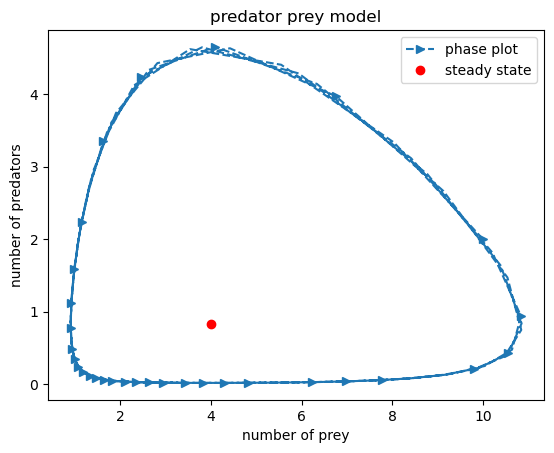

In [60]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.plot(4,0.8333,"ro", label = "steady state")
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator/prey model')

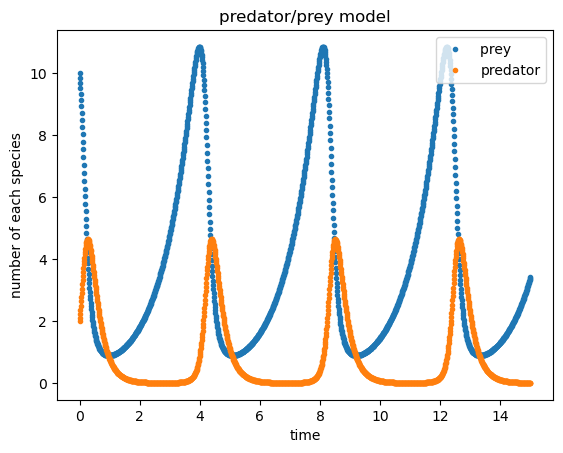

In [77]:
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)
    

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator/prey model")

Text(0.5, 1.0, 'predator prey model')

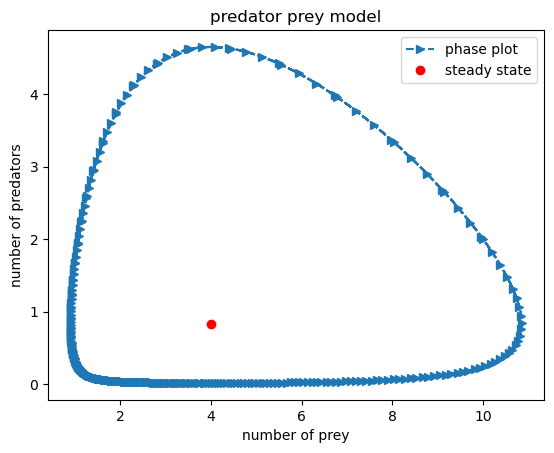

In [78]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.plot(4,0.83,"ro", label = "steady state")
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator/prey model')

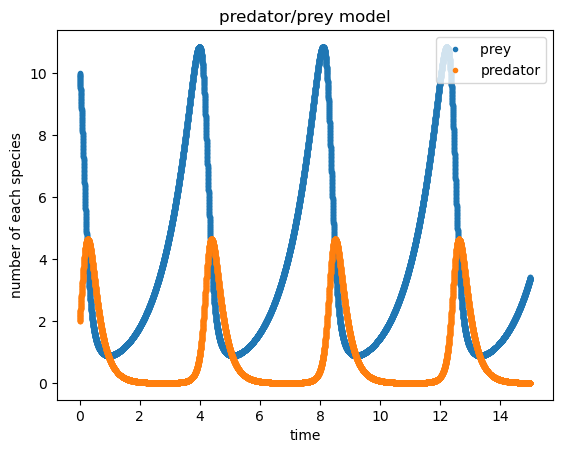

In [79]:
# set the initial parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.001                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)
    

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator/prey model")

Text(0.5, 1.0, 'predator prey model')

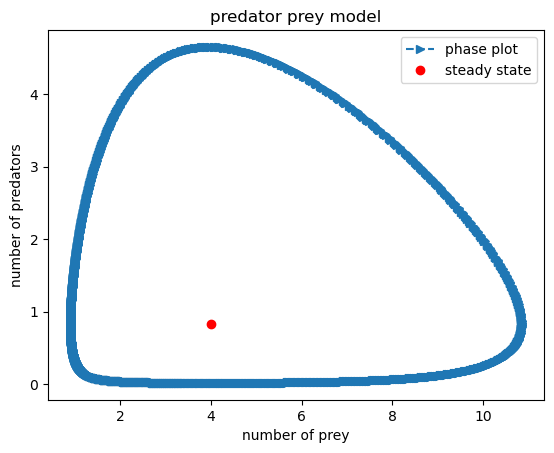

In [80]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.plot(4,0.83,"ro", label = "steady state")
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

**Answer**  Using the Runge-Kutta method (RK4), the predator-prey model produces more accurate and stable solutions compared to Euler's method. RK4 evaluates intermediate slopes at multiple points within each time step, resulting in smoother oscillations and better adherence to the expected dynamics of the Lotka-Volterra equations. 
In the time series plot, the prey and predator populations oscillate periodically around their steady-state values ( with RK4 capturing these patterns more accurately than Euler's method, which can introduce numerical drift or instability, especially for larger time step. RK4 tolerates larger dt without significant loss of accuracy, unlike Euler's method, which may produce distorted or diverging spirals. While reducing dt improves accuracy for both methods, RK4 achieves higher precision with fewer steps, making it computationally efficient and better suited for modeling the oscillatory dynamics of the predator-prey system.

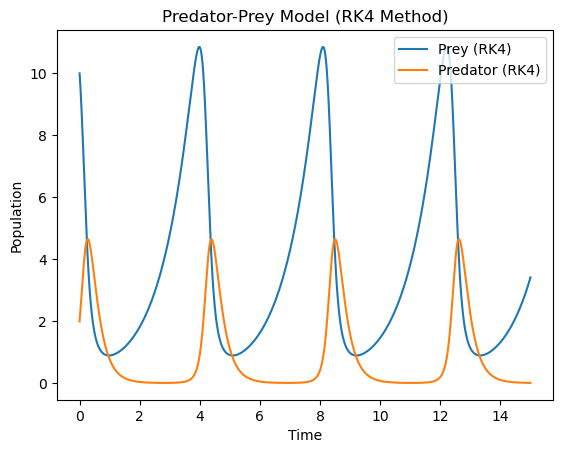

In [26]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Lotka-Volterra model
alpha = 1.0
beta = 1.2
gamma = 4.0
delta = 1.0

# Define the Lotka-Volterra equations
def f(u):
    """Returns the rate of change of species."""
    x = u[0]  # Prey population
    y = u[1]  # Predator population
    return np.array([x * (alpha - beta * y), -y * (gamma - delta * x)])

# Runge-Kutta 4th order method
def RK4(u, f, dt):
    """Returns the solution at the next time-step using RK4."""
    k1 = f(u)
    u1 = u + (dt / 2.0) * k1
    k2 = f(u1)
    u2 = u + (dt / 2.0) * k2
    k3 = f(u2)
    u3 = u + dt * k3
    k4 = f(u3)
    return u + (dt / 6.0) * (k1 + 2.0 * k2 + 2.0 * k3 + k4)

# Simulation parameters
T = 15.0                           # Final time
dt = 0.0001                        # Time increment
N = int(T / dt) + 1                # Number of time steps

# Initial conditions
x0 = 10.0                          # Initial prey population
y0 = 2.0                           # Initial predator population
u_rk4 = np.zeros((N, 2))           # Initialize the solution array
u_rk4[0] = np.array([x0, y0])      # Set initial conditions

# Time integration using RK4
for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, dt)
 # Extract populations for plotting
time = np.linspace(0.0, T, N)
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]

# Plot the results

plt.plot(time, x_rk4, '-', label='Prey (RK4)')
plt.plot(time, y_rk4, '-', label='Predator (RK4)')
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Predator-Prey Model (RK4 Method)")

plt.show()

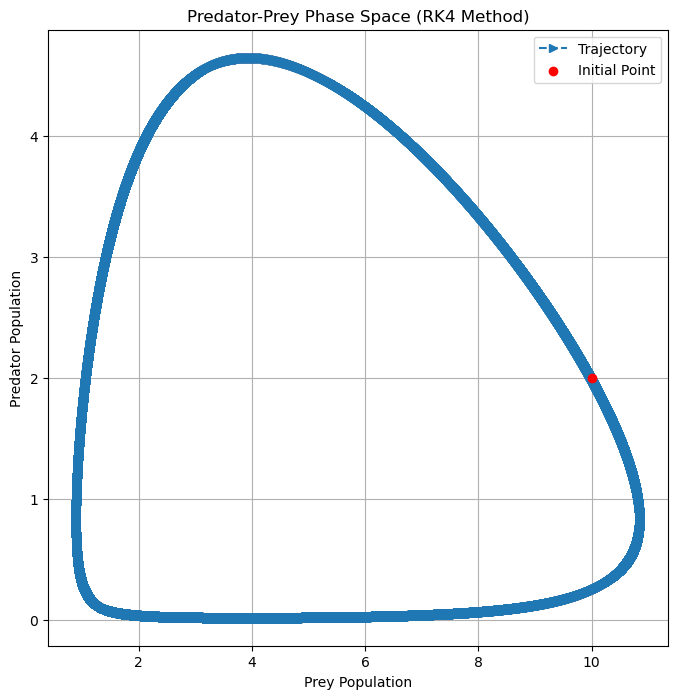

In [27]:
# Phase space plot
plt.figure(figsize=(8, 8))
plt.plot(x_rk4, y_rk4,'-->', label='Trajectory')
plt.scatter([x0], [y0], color='red', label='Initial Point', zorder=5)
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Predator-Prey Phase Space (RK4 Method)')
plt.legend()
plt.grid()
plt.show()

#### E.4 Exploring parameter space
Vary the interactions between species by changing $\alpha, \beta, \gamma, \delta$ and see what happens to the population evolution as well as phase plots. How does changing each parameter individually affect the system?

In [81]:
#initail perameters 
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

Text(0.5, 1.0, 'predator/prey model')

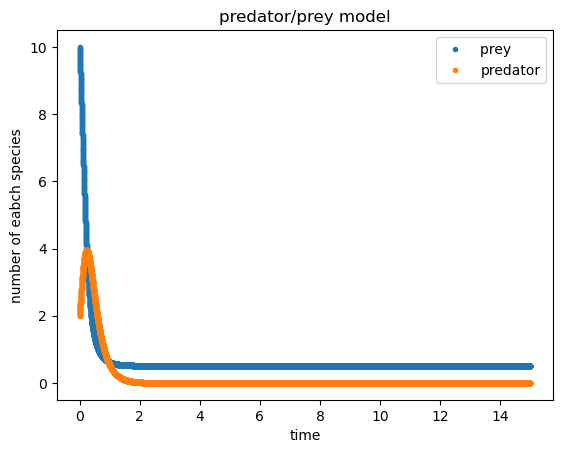

In [82]:
alpha = 0 #the prey population declines along with predators who bump up initially from consuming all prey 

beta = 1.2 

gamma = 4   
    
delta = 1.     
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.001                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)
    
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of eabch species")
#title
plt.title("predator/prey model")

Text(0.5, 1.0, 'predator/prey model')

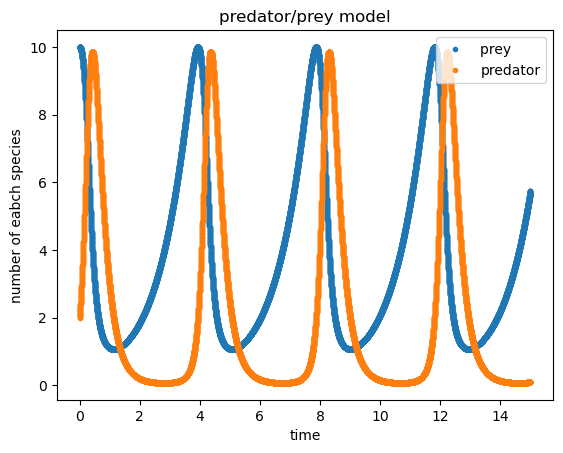

In [83]:
alpha = 1

beta = .5 

gamma = 4   
    
delta = 1.     
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.001                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)
    
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of eabch species")
#title
plt.title("predator/prey model")

**Answer** 𝛼 (prey growth rate): Increasing 𝛼 enhances prey growth, leading to larger oscillations in both populations. Reducing 𝛼 or setting it to 0 eliminates prey growth, causing extinction dynamics.
𝛽(predation rate): Highe β intensifies predator-prey interactions, leading to more rapid oscillations and steeper declines in prey during predator population peaks.
𝛾 (predator death rate): Increasing γ causes faster predator decline, potentially stabilizing prey populations if predators cannot sustain themselves.
δ (predator reproduction efficiency): Increasing 𝛿 boosts predator growth during high prey availability, amplifying population cycles.

#### E.5 (Advanced, required for grad students)
Modify the differential equations to include other types of interactions. See advanced predator prey example link at the top for ideas. You might add in a self-eating (i.e. $-ay^2$) term into the predator equation. Or do the zombie apocalypse example linked above.

Zombie apocalypse example 

dS/dt = P - BSZ - dS dZ/dt = BSZ + GR - ASZ dR/dt = dS + ASZ - GR

with the following notations:

S: the number of susceptible victims
Z: the number of zombies
R: the number of people "killed"
P: the population birth rate
d: the chance of a natural death
B: the chance the "zombie disease" is transmitted (an alive person becomes a zombie)
G: the chance a dead person is resurrected into a zombie
A: the chance a zombie is totally destroyed

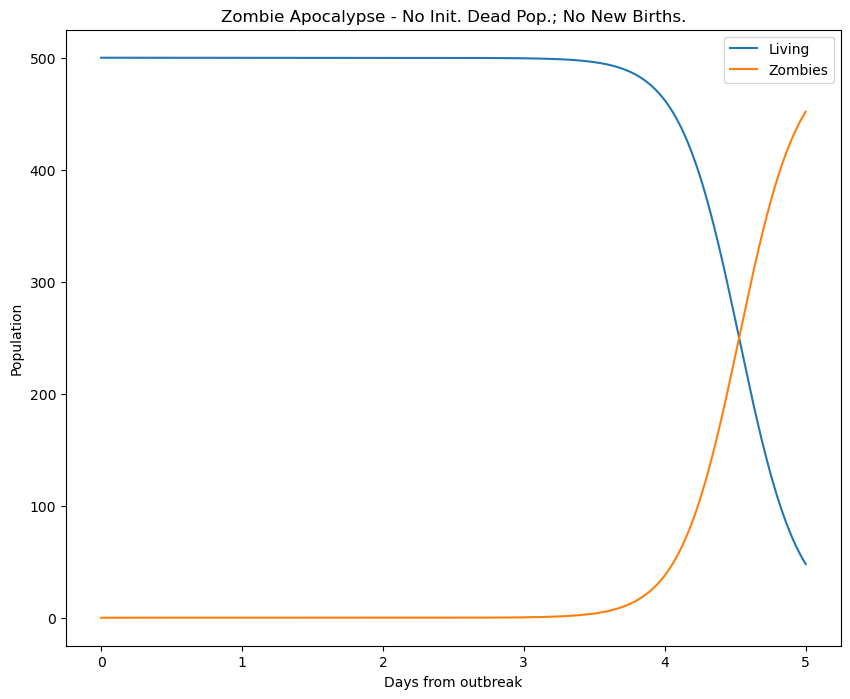

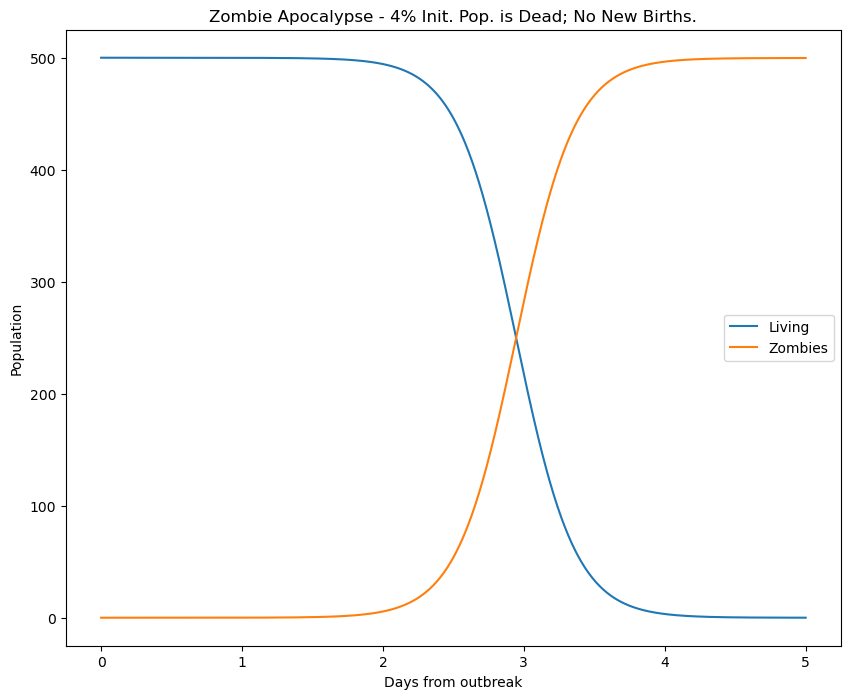

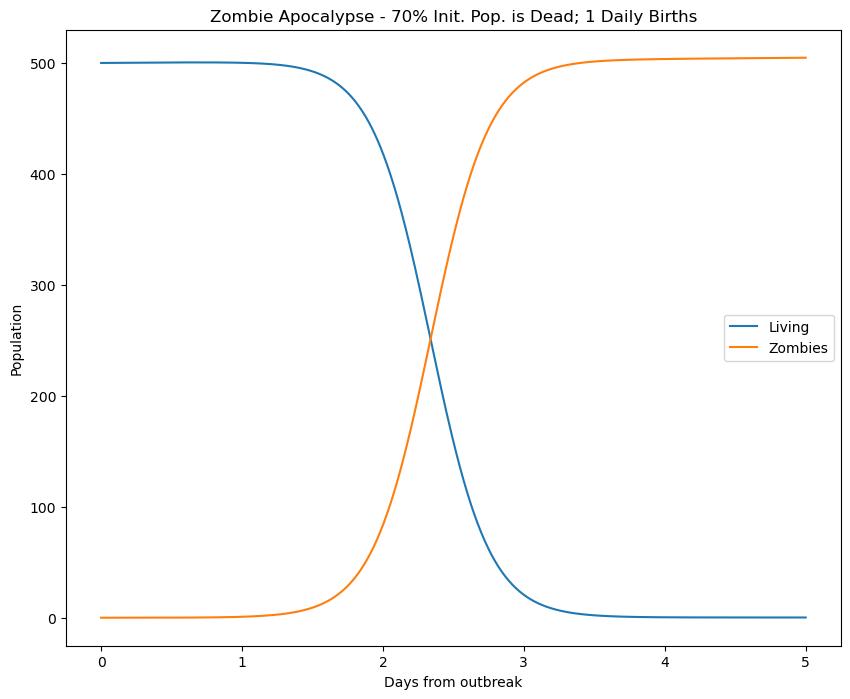

In [32]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
P = 0        # Birth rate
d = 0.0001   # Natural death percent (per day)
B = 0.0095   # Transmission percent (per day)
G = 0.0001   # Resurrect percent (per day)
A = 0.0001   # Destroy percent (per day)

# Model equations
def f(y, t):
    Si = y[0]  # Susceptible humans
    Zi = y[1]  # Zombies
    Ri = y[2]  # Removed (dead)
    
    # The model equations (corrected):
    f0 = P - B * Si * Zi - d * Si               # Change in living humans
    f1 = B * Si * Zi + G * Ri - A * Zi         # Change in zombies
    f2 = d * Si + A * Zi - G * Ri              # Change in dead population
    
    return np.array([f0, f1, f2])

# Time grid
t = np.linspace(0, 5., 1000)  # 5 days, 1000 time points

# Initial conditions for first scenario
S0 = 500.   # Initial living population
Z0 = 0      # Initial zombie population
R0 = 0      # Initial dead population
y0 = [S0, Z0, R0]

# Solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# Plot the first scenario
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)

# Second scenario: 4% of initial population is dead
R0 = 0.04 * S0
y0 = [S0, Z0, R0]

# Solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# Plot the second scenario
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 4% Init. Pop. is Dead; No New Births.')
plt.legend(loc=0)

# Third scenario: 70% of initial population is dead, 1 daily birth
R0 = 0.70 * S0
P = 1.  # 1 new birth daily
y0 = [S0, Z0, R0]

# Solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# Plot the third scenario
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 70% Init. Pop. is Dead; 1 Daily Births')
plt.legend(loc=0)

plt.show()


Predator Self-Limitation:
Adding  −𝑎𝑦2 causes predator populations to stabilize or decrease due to intraspecific competition. This may result in a smaller predator population and less extreme oscillations.
Zombie Apocalypse:
Increasing 𝛽 (rate of human-to-zombie conversion) leads to a faster collapse of the human population.
Higher γ (zombie death rate) can allow humans to recover after initial outbreaks.

Scenario 1: No initial deaths or births. Zombies grow exponentially after the outbreak, decimating the human population.
Scenario 2: 4% of the population starts as dead. The zombie population grows faster due to initial deaths.
Scenario 3: 70% of the population starts as dead, with 1 daily birth. This slightly slows the zombie outbreak but does not prevent population collapse.